# House Price Prediction

This notebook is meant to take you through the different phases of undertaking a data science project (from analysis down to model deployemnt).

### Data Analysis

In [1]:
# Importing necessary libraries for this task

# for handling the dataset
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt

# for displaying entire columns contained in a dataframe
pd.set_option('display.max_columns', None)

In [2]:
# loading dataset
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
print("train_set shape: ", train_set.shape)

train_set shape:  (1460, 81)


In [3]:
# # combining both train and test set
# data = pd.concat([train_set, test_set], axis=0, sort=False)

# # glancing at the combo
# print('data_shape: ', data.shape)
# data.head(3)

Analysis will be carried out to identify:
- Missing values
- Numerical features and their distribution
- Categorical features and their cardinality
- Outlier Detection and removal
- Identify relationship between independent features and dependent feature: SalePrice

#### Missing values

In [4]:
# make a list of features with missing values
vars_with_na = []
for var in train_set.columns:
    if train_set[var].isnull().sum() > 0:
        vars_with_na.append(var)

# checking percentage of missing values
train_set[vars_with_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

#### Identifying numerical features

In [5]:
# make a list of numerical variables
num_vars = []
for var in train_set.columns:
    if train_set[var].dtypes != 'O':
        num_vars.append(var)
        
print("Number of numerical features: ", len(num_vars))
train_set[num_vars].head()

Number of numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


- We can see that the Id feature, is not useful because it's just an identifier, hence would not be used in making predictions.
- We can also see some year variables in the numerical feature set (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold). Year features are usually not been used in their raw state, therefore we'll convert them into intervals so they can be much useful for prediction.

In [6]:
# train_set.drop('Id', axis=1, inplace=True)

In [7]:
# list of features that contain year information from the numerical feature set
year_vars = []
for var in num_vars:
    if 'Yr' in var or 'Year' in var:
        year_vars.append(var)
        
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
train_set[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


While we here, it makes sense to check the relationship between the year houses in the dataset was sold (YrSold) and the price (SalePrice) they were sold for:

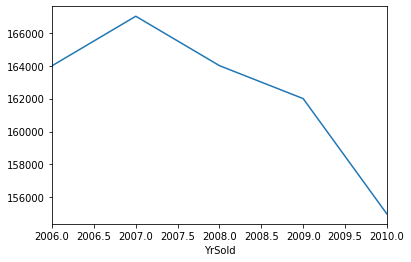

In [9]:
# train_set.groupby('YrSold')['SalePrice'].median().plot.bar()
train_set.groupby('YrSold')['SalePrice'].median().plot()

We can see that the price for which the houses were sold decreases over the year and this isn't always the case in reality. Let explore other year features.

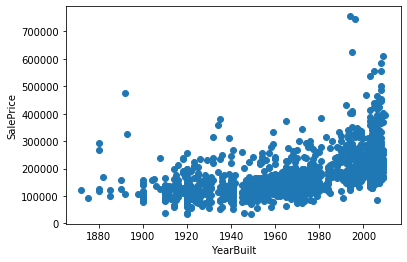

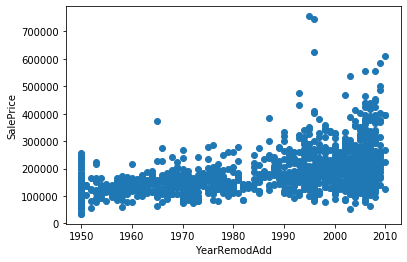

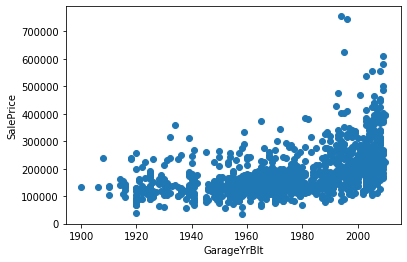

In [10]:
def explore_yr_vars(df, var):
    df = df.copy()
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    

for var in year_vars:
    if var != 'YrSold':
        explore_yr_vars(train_set, var)

It can be seen that the farther the time in each of the year feature the lesser the price for which the house was sold for. That is houses built recently cost higher than otherwise. 

#### Drilling deep into numerical features

We know that numerical features can either be discrete or continuous, right?
- Discrete : contain finite set of values
- Continuous : contains infinite set of values

##### Discrete features

In [11]:
discrete_vars = []

for var in num_vars:
    if len(train_set[var].unique()) < 20 and var not in year_vars:
        discrete_vars.append(var)
        
print('Number of discrete features: ', len(discrete_vars))
train_set[discrete_vars].head()

Number of discrete features:  14


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


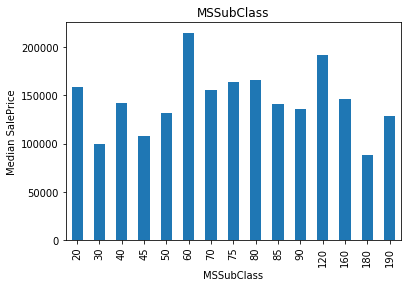

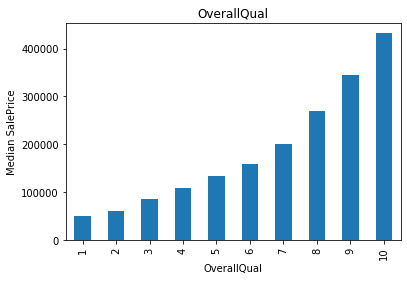

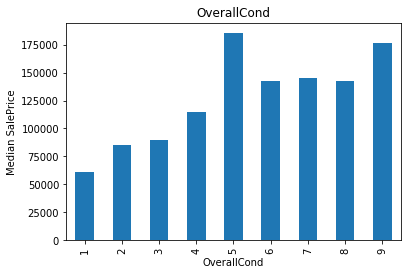

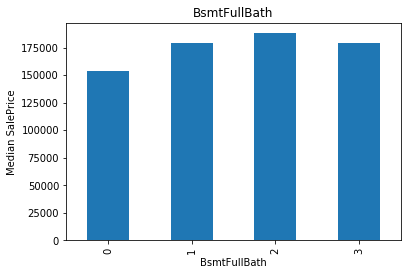

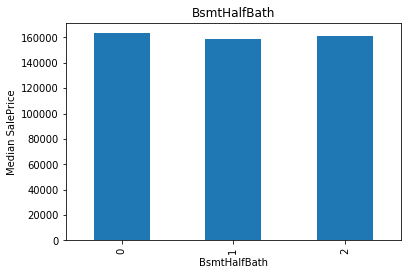

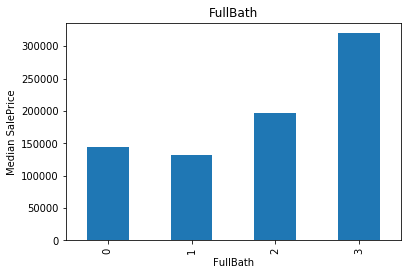

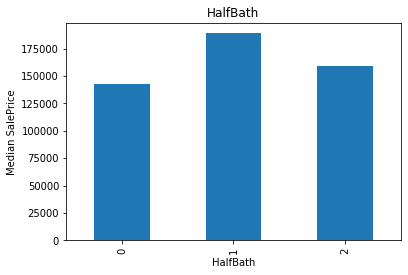

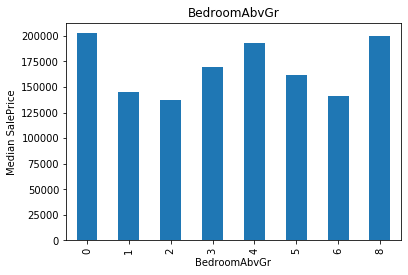

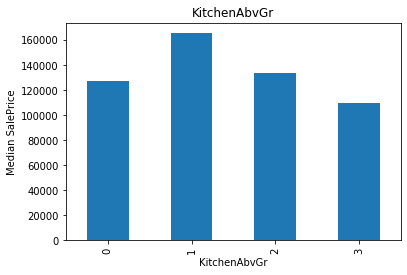

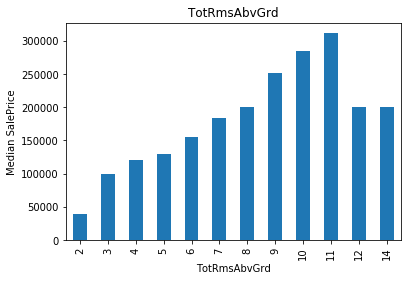

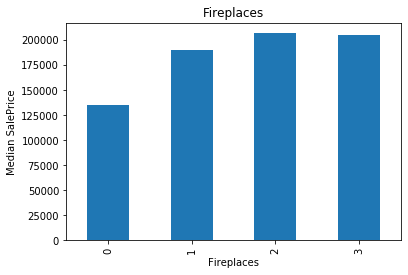

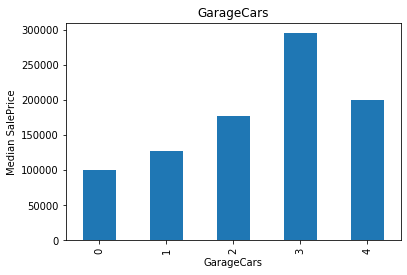

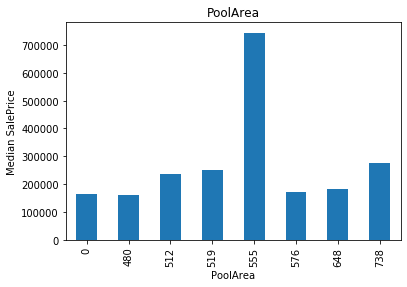

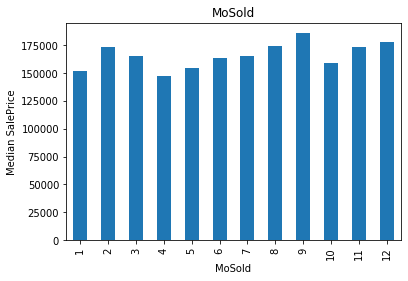

In [12]:
def explore_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median SalePrice')
    plt.show()
    

for var in discrete_vars:
    explore_discrete(train_set, var)

The plots show that the relationship between the discrete variale and the target variable isn't always monotonic as seen in OverallQual.

##### Continuous features

In [13]:
cont_vars = []
for var in num_vars:
    if var not in discrete_vars + year_vars + ['Id']:
        cont_vars.append(var)

print('Number of continuous variables: ', len(cont_vars))
train_set[cont_vars].head()

Number of continuous variables:  19


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


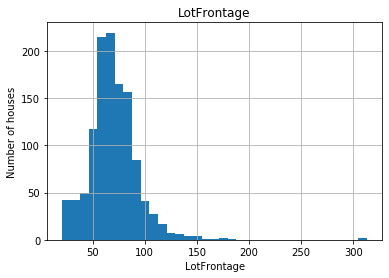

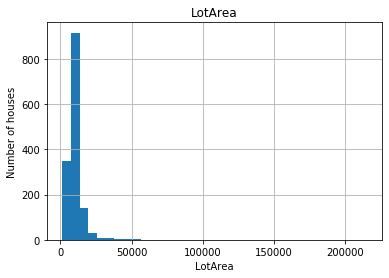

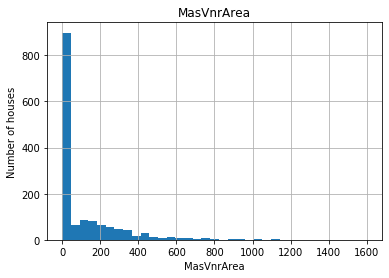

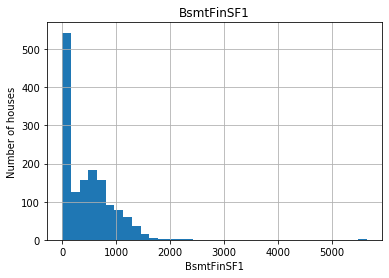

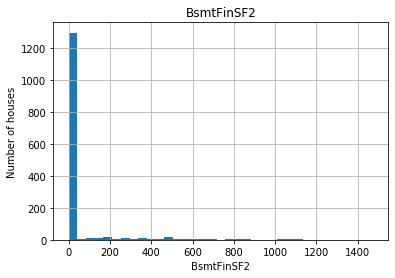

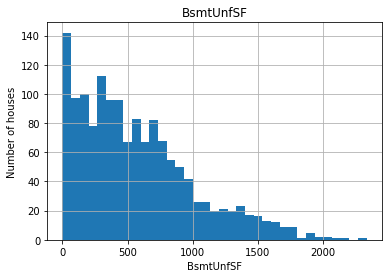

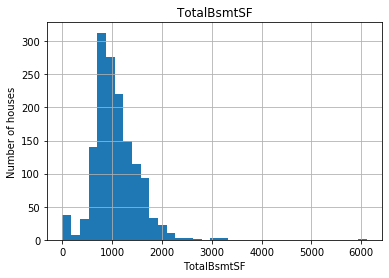

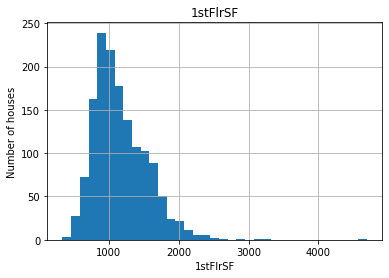

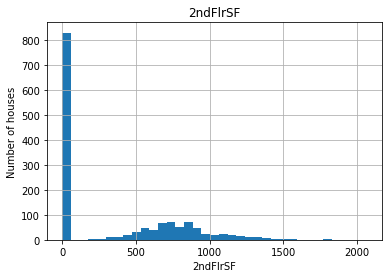

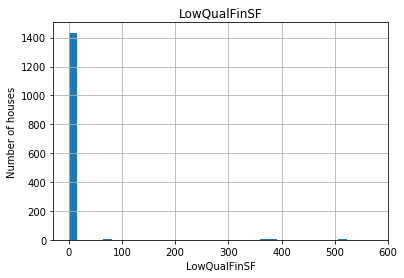

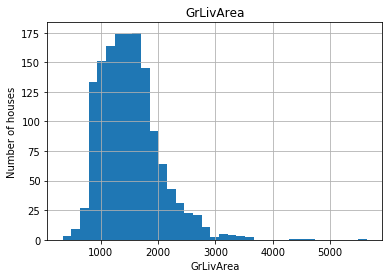

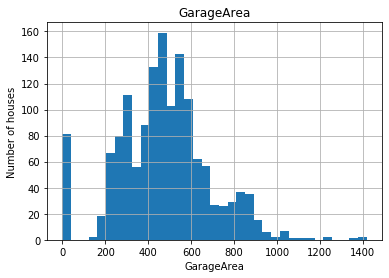

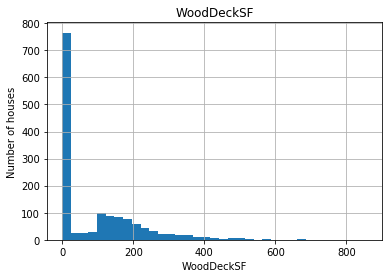

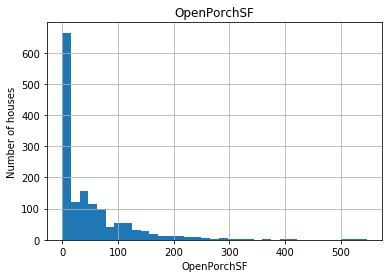

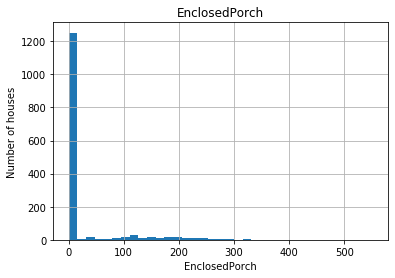

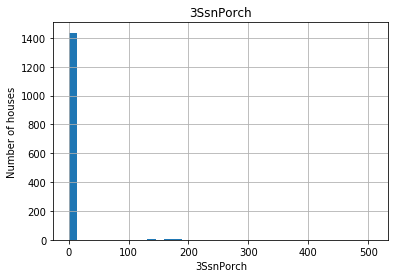

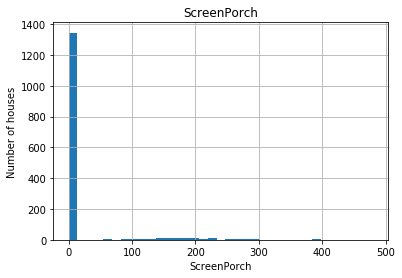

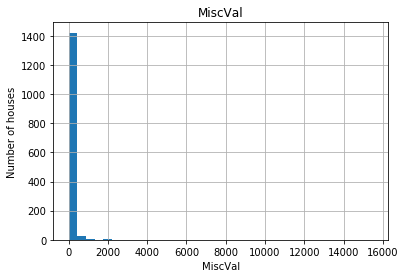

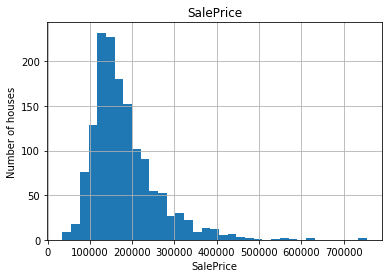

In [14]:
def explore_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=35)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
    
for var in cont_vars:
    explore_continuous(train_set, var)

It is obvious from the plot that the continuous variables are not normally distributed, 'SalePrice' included. This is not good for a linear model, we need a somewhat normally distributed feature set.

One of the most common methods of doing this is with logarithm transformation, which returns a variable that is somewhat normal. Let's see how this works.

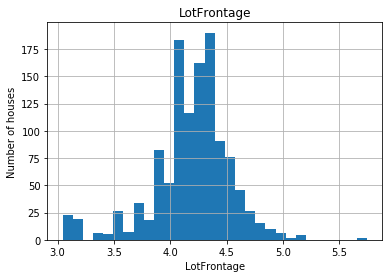

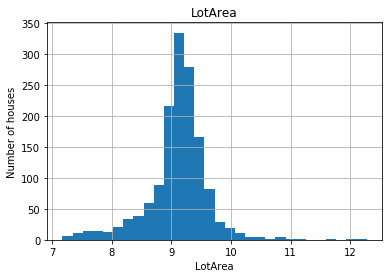

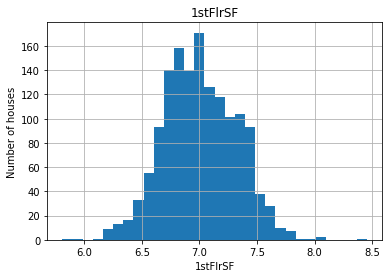

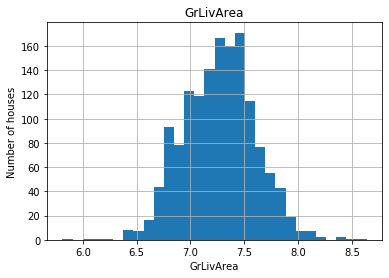

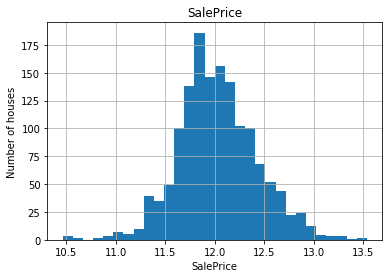

In [15]:
def explore_transformed_continuous_var(df, var):
    df = df.copy()
    
    #     since log transform doesn't work well with 0 or negative values,
    #     we will leave those out for now
    if any(train_set[var] <= 0):
        pass
    else:
        #   transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
        
        
for var in cont_vars:
    explore_transformed_continuous_var(train_set, var)

We can see that the variables are somewhat normal now, thanks to logarithm transformation :)

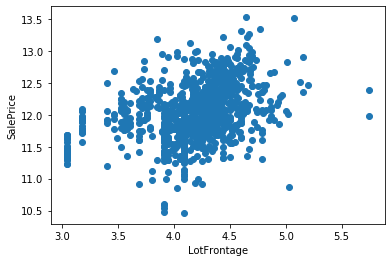

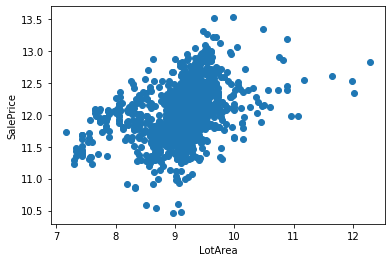

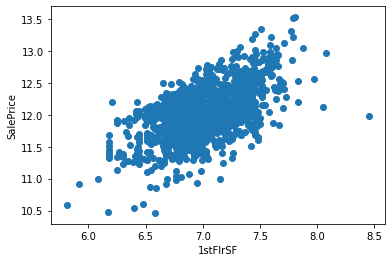

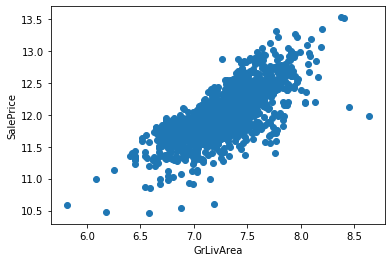

In [16]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:


def explore_transformed_continuous_var_2(df, var):
    df = df.copy()

    # log does not take negative values, so let's be careful and skip those variables
    if any(df[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df['SalePrice'] = np.log(df['SalePrice'])
        
        # plot
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'SalePrice':
        explore_transformed_continuous_var_2(train_set, var)

From the plot, we can see that there is some kind of linear relationship between the target and the last two variables.

#### Outlier detection

Having values that are extremely far away from the central value of our variable is not usually good for a linear model. Therefore, it is important to be able to identify them and deal with them appropriately.

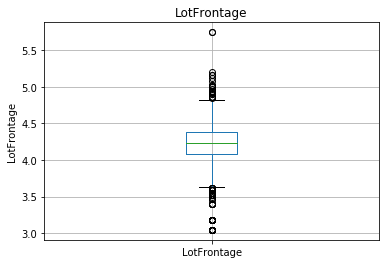

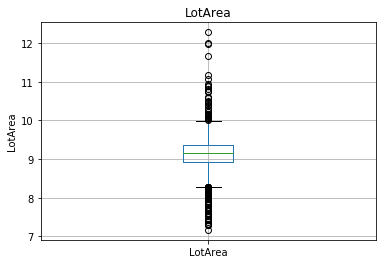

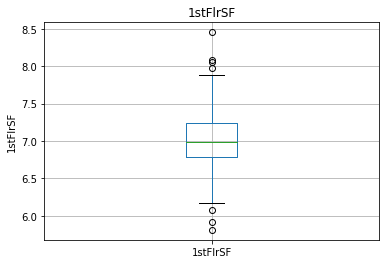

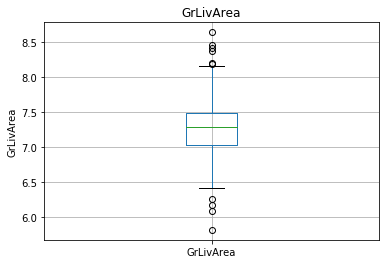

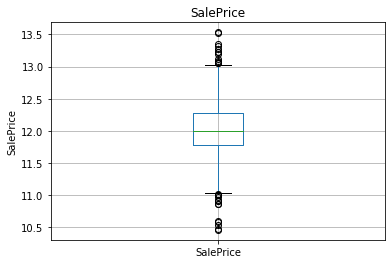

In [17]:
def detect_outliers(df, var):
    df = df.copy()
    
    if any(df[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
        
for var in cont_vars:
    detect_outliers(train_set, var)

A good number of the continuous variables contain outliers, which are not good for our model. Hence, it is worth noting that we'll do somthing about them.

### Identifying categorical variales

In [18]:
cat_vars = []
for var in train_set.columns:
    if train_set[var].dtypes == 'O':
        cat_vars.append(var)
        
print('Number of categorical features: ', len(cat_vars))
train_set[cat_vars].head()

Number of categorical features:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Checking the number of levels in each categorical featuers

In [19]:
train_set[cat_vars].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

The levels for our categorical features are not that high, so we are good.

##### Rare labels identification

Rare labels are labels in our categorical features that are only present in a small number.

In [20]:
def identify_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    #   determine the % of observation in entire data
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    
    #   return categories that are rare
    return tmp[tmp < rare_perc]

for var in cat_vars:
    print(identify_rare_labels(train_set, var, 0.01))    

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64
Street
Grvl    0.00411
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
LotShape
IR3    0.006849
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64
LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64
LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64
Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64
Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64
Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64
RoofStyle
Flat       0.0089

Some of the categorical variables show multiple labels that are present in less than 1%. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, lets explore the relationship between the categories of the different variables and the target:

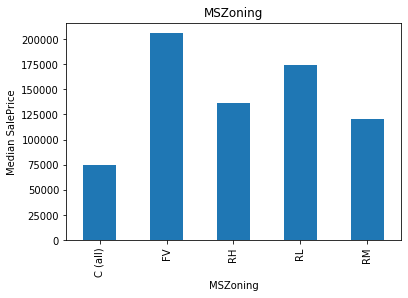

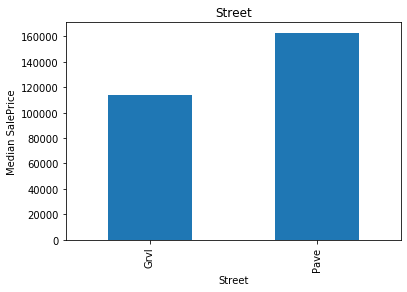

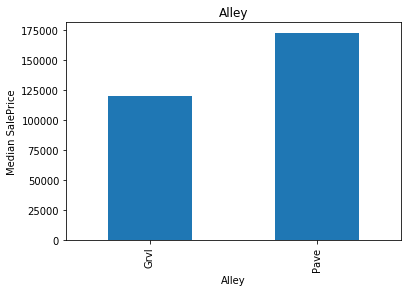

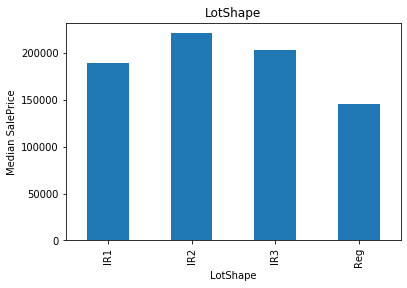

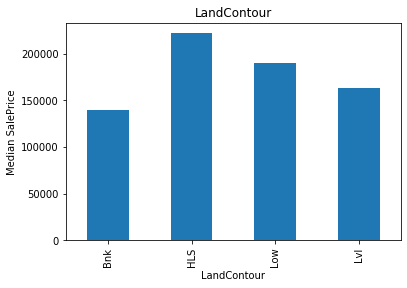

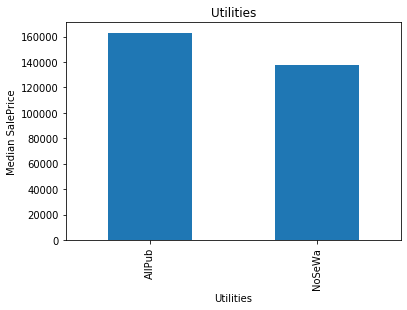

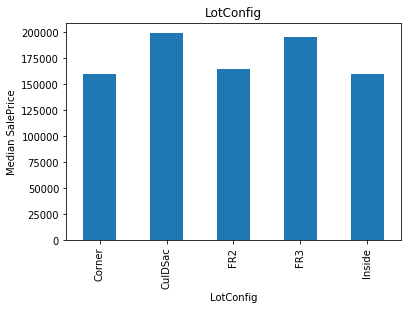

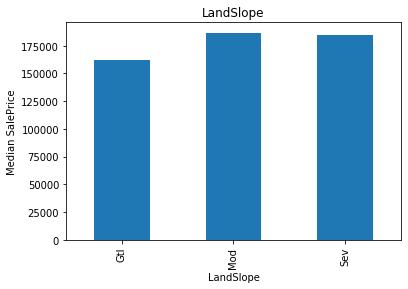

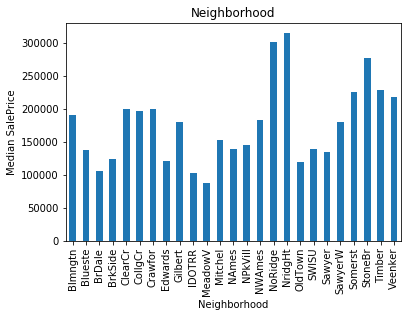

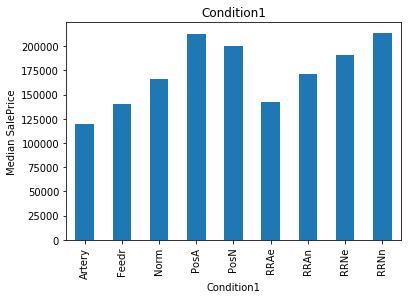

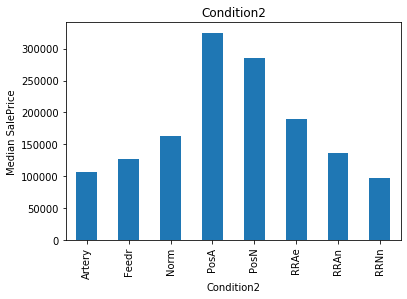

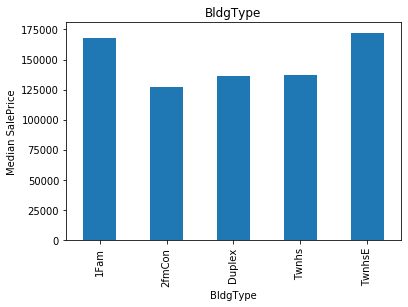

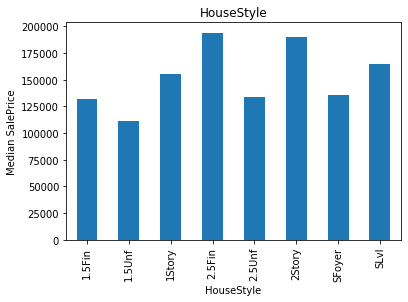

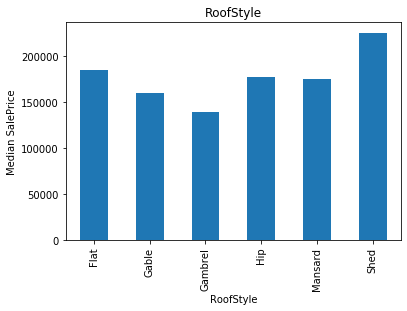

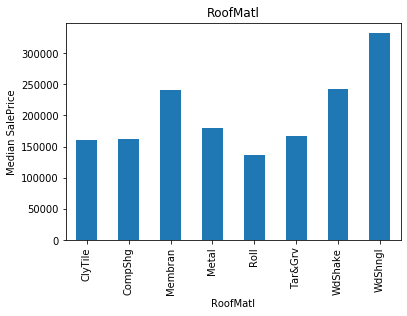

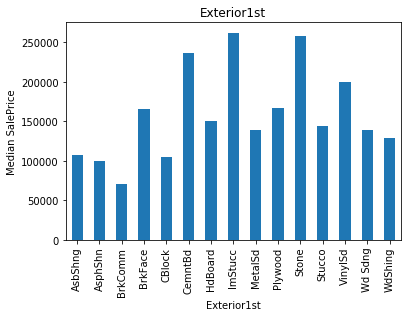

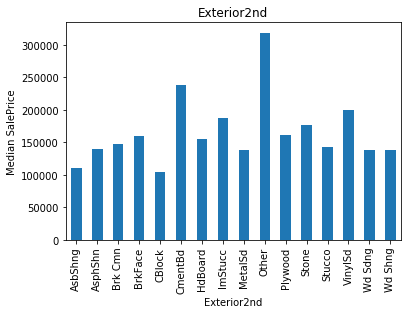

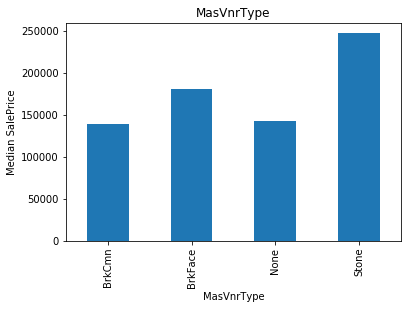

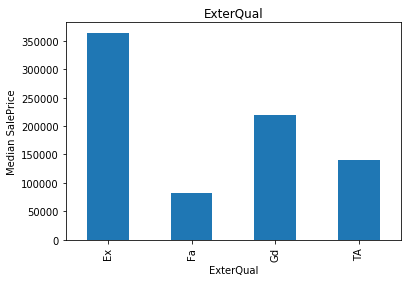

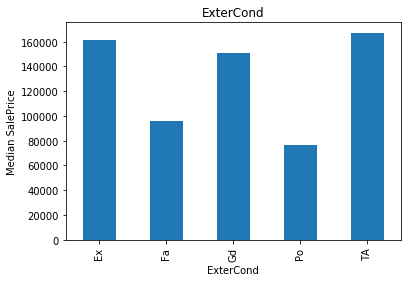

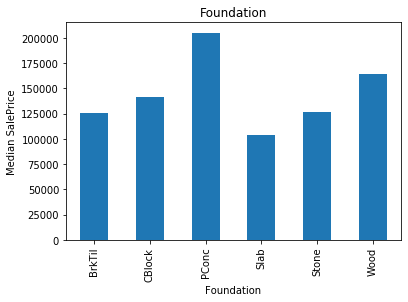

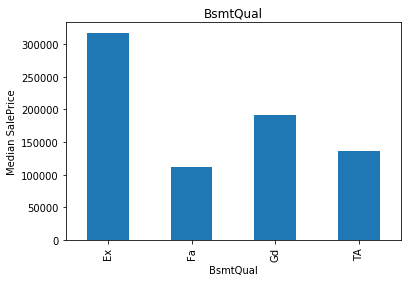

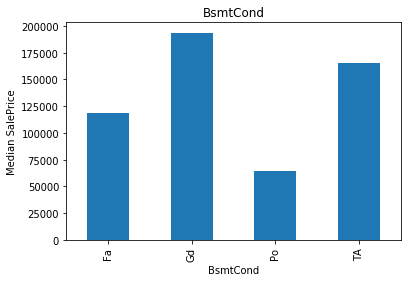

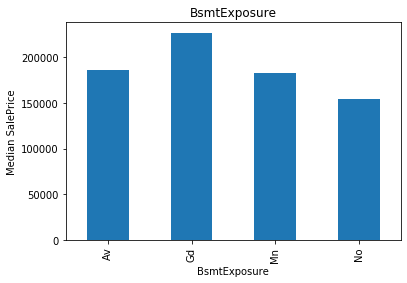

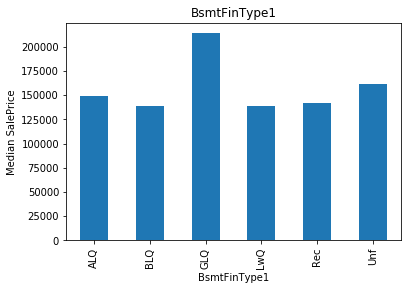

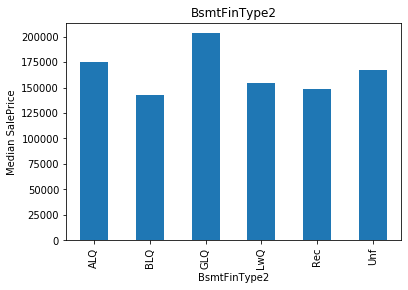

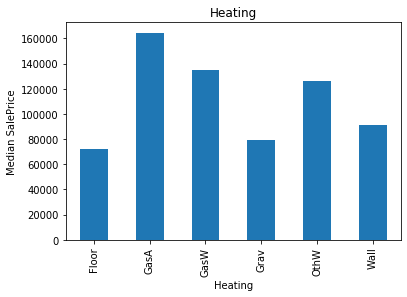

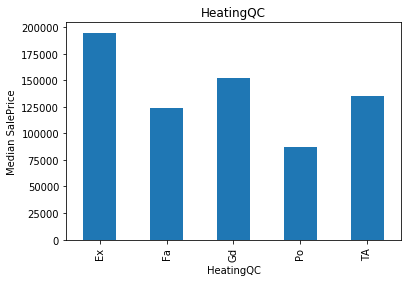

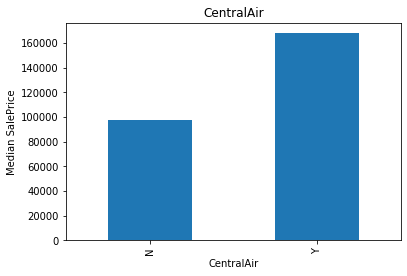

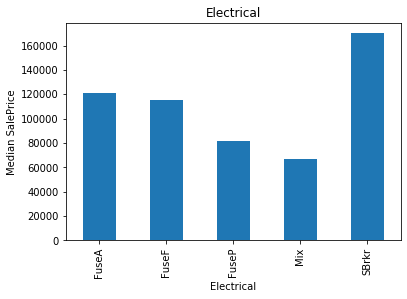

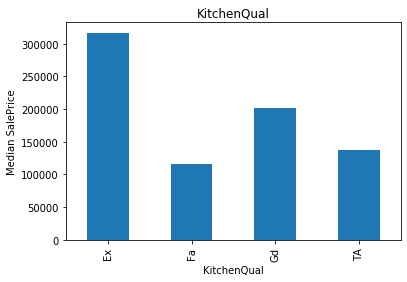

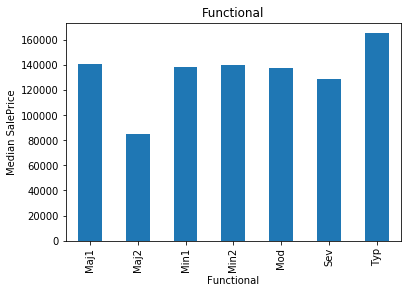

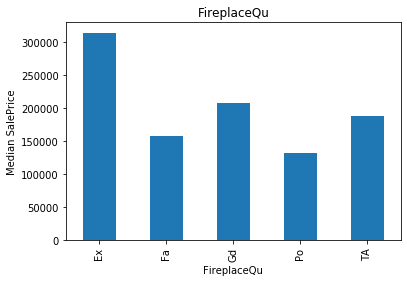

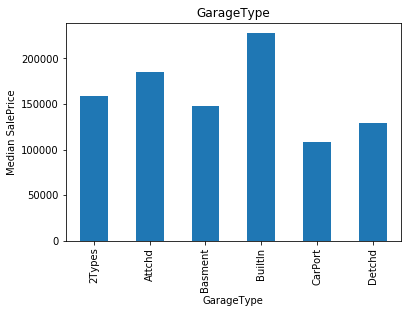

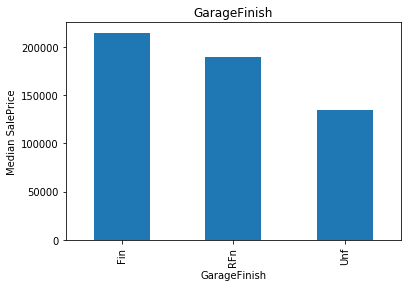

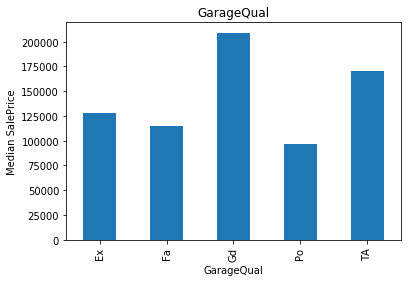

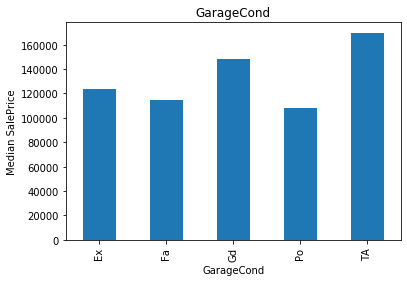

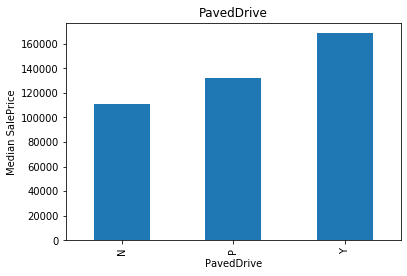

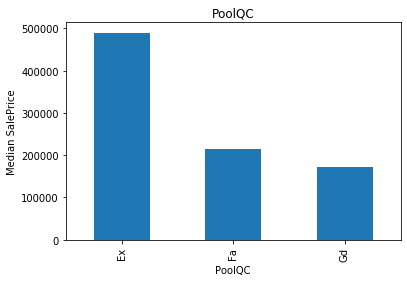

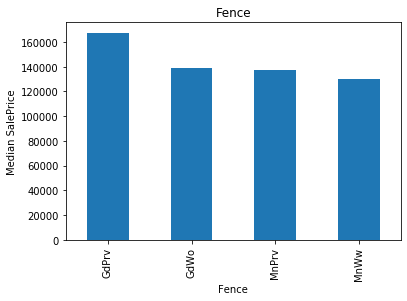

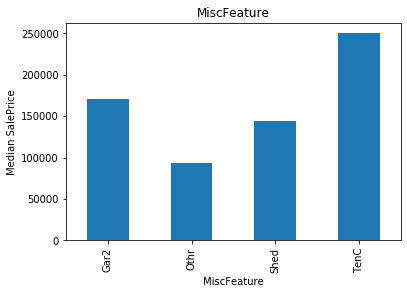

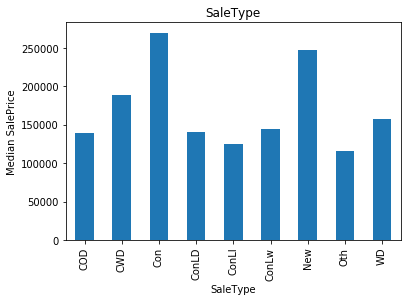

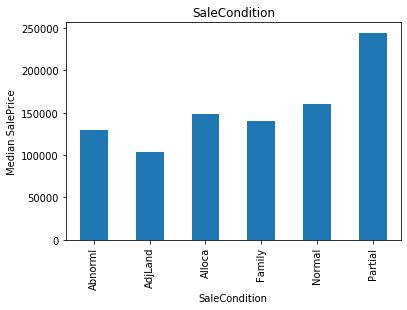

In [21]:
for var in cat_vars:
    explore_discrete(train_set, var)

From the plot above, the categories give valuable information on the SalePrice, as each shows different median prices.

This exploration gives us a good idea on what needs to be done in the feature engineering phase of the project.